
<h2>Location Analysis for New Itallian Restaurant<br>
in Saint-Petersburg, Russia</h2>
    


<h3>0. Presentation</h3>

* [One-page Presentation (PDF on GitHub)](https://github.com/spb-r-u/Coursera-Capstone/blob/master/present.pdf)

* [Presentation (PDF on GitHub)](https://github.com/spb-r-u/Coursera-Capstone/blob/master/spb-districts.pdf) 

<h3>1. Intro</h3>
<div>St. Petersburg is the second largest city in Russia after Moscow. It is home to up to 6 million people. The city has many historical sights, 100 years ago this city was the capital of the country. The city is interesting for guests of the city and local residents. The historical center of the city deserves special attention.</div>
<div>&nbsp;<br></div>
<div>We have an opportunity in the fact that St. Petersburg is actively developing and the restaurant business has not yet been fully formed in it. Locals and tourists loves: pizza, sushi, kebabs and grilled meat. We looking for a place to open one restaurant with Italian cuisine, but we need the best place to open it.</div>
<div>&nbsp;<br></div>
<div>Target is a list of city districts in which locals and tourists are actively spending (not industrial zone, not sleeping areas), while there should be no other Italian restaurants.</div>
<div>&nbsp;<br>&nbsp;<br></div>

<h3>2. Data</h3>
<div>Data is collected from various sources:</div>
<div>&nbsp;&nbsp;&nbsp; - Official website of the city administration.</div>
<div>&nbsp;&nbsp;&nbsp; - Geographic coordinates of the regions are collected from the Dadata API map server.</div>
<div>&nbsp;&nbsp;&nbsp; - Geographical coordinates of restaurants and other POIs is collected using the Foursquare API and Nominatim (OpenStreetMap)</div>
<div>As a result, we get a table with a list of all city districts and geographic coordinates.</div>
<div>&nbsp;<br></div>

In [1]:
!pip install xlrd
!pip install openpyxl
!pip install geopy
!pip install folium
!pip install bs4
!pip install dadata

     |████████████████████████████████| 96 kB 385 kB/s 
     |████████████████████████████████| 242 kB 413 kB/s 
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=6ea0cd31b16939c161e06871046dc0e970b1200778a04603c5250277070cf6f2
  Stored in directory: /root/.cache/pip/wheels/e2/bd/55/048b4fd505716c4c298f42ee02dffd9496bb6d212b266c7f31
Successfully built et-xmlfile
     |████████████████████████████████| 115 kB 410 kB/s 
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=0c889f1f74d461d4c00bb3d977fd01787808e85378c78feeabf66d85f9d5f5d6
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4
     |████████████████████████████████| 68 kB 311 kB/s 
     |████████████████████████████████| 55 kB 893 kB/s 
     |████████████████████████████████| 54 kB 766 kB/s 


In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spbadr/spb_addr_result.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
# Get addresses from web, then write them to csv for use from file:
#mo_spb = pd.read_excel('../input/spb-data-ru-en/spb_new.xlsx')

# Get coordinates from DaData, then write them to csv for use from file:

#from dadata import Dadata
#token = "c0a159aec57b0bea2e656cf6d539c78c8e14db0c"
#secret = "1f0faaad0fbcb19603b50471e7a8b8a91af0a17a"
#dadata = Dadata(token, secret)

#lat=[]
#lon=[]
#for i in mo_spb['Address_RU']:
#    result = dadata.clean("address", i)
#    lat.append(result['geo_lat'])
#    lon.append(result['geo_lon'])
#mo_spb['Latitude'] = lat
#mo_spb['Longitude'] = lon


#mo_spb.to_csv('spb_addr_result.csv', index=False)

# DaData is paid service, so we will use results next time:

mo_spb = pd.read_csv('../input/spbadr/spb_addr_result.csv')
mo_spb

,Code,Citizen,Neighborhood,Borough,Neighborhood_RU,Borough_RU,Address_RU,Latitude,Longitude
0,40301000,37642,Kolomna,Admiralteysky District,Коломна,Адмиралтейский район,"190068, Санкт‑Петербург, набережная Крюкова ка...",59.923298,30.296024
1,40302000,28105,Sennoj okrug,Admiralteysky District,Сенной округ,Адмиралтейский район,"190031, Санкт‑Петербург, набережная реки Фонта...",59.924663,30.324222
2,40303000,30533,Admiraltejskij okrug,Admiralteysky District,Адмиралтейский округ,Адмиралтейский район,"190000, Санкт‑Петербург, ул. Декабристов, д. 18",59.680605,30.457487
3,40304000,29572,Semenovskij,Admiralteysky District,Семеновский,Адмиралтейский район,"190013, Санкт‑Петербург, ул. Серпуховская, д. 16",59.915583,30.323295
4,40305000,30415,Izmajlovskoe,Admiralteysky District,Измайловское,Адмиралтейский район,"190005, Санкт‑Петербург, ул. Егорова, д. 18",59.912785,30.314282
...,...,...,...,...,...,...,...,...,...
106,40909000,13508,№ 78,Tsentralny District,№ 78,Центральный район,"191023, Санкт‑Петербург, ул. Гороховая, д. 48",59.926308,30.325484
107,40910000,50567,Litejnyj okrug,Tsentralny District,Литейный округ,Центральный район,"191123, Санкт‑Петербург, ул. Фурштатская, д. 27",59.944999,30.358188
108,40911000,90337,Smolninskoe,Tsentralny District,Смольнинское,Центральный район,"191124, Санкт‑Петербург, Суворовский пр., д. 60",59.945494,30.387772
109,40912000,1474,Ligovka-YAmskaya,Tsentralny District,Лиговка-Ямская,Центральный район,"191024, Санкт‑Петербург, ул. Харьковская, д. 6/1",59.926733,30.371681


In [4]:
address = 'Saint Petersberg, Russia'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

The geograpical coordinate are 59.938732, 30.316229.


In [5]:
map_spb = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, borough, neighborhood, postalcode in zip(mo_spb['Latitude'],mo_spb['Longitude'],mo_spb['Borough'],mo_spb['Neighborhood'],mo_spb['Code']):
    label = '{}, {}, {}'.format(neighborhood, borough, postalcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='grey',
        fill_opacity=0.7,
        parse_html=False).add_to(map_spb)  
    
map_spb

In [6]:
CLIENT_ID = 'EYKGEV2E3LS5ZZRLWR0GCS2WIVVF5TLBAGGXDTJ0Y4BYIII5' # your Foursquare ID
CLIENT_SECRET = 'RY1J3KSIOGNX5WWLF2PISYTSFTYGKTI1VLNK3DHLLJFXO3LW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version 20201224
LIMIT = 200 
DEFAULT_LIMIT = 200
DEFAULT_RADIUS = 750

In [7]:
import time
FOURSQUARE_BASE_EXPLORE_URL = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'

def explore_venues(dataframe):
    
    columns = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
                'Venue', 'Venue Latitude', 'Venue Longitude',
                'Category']

    venues_list = []
    
    for i, n in dataframe.iterrows():
        Neighborhood = n['Neighborhood']
        latitude = n['Latitude']
        longitude = n['Longitude']

        explore_url = FOURSQUARE_BASE_EXPLORE_URL.format(CLIENT_ID,
                                                         CLIENT_SECRET,
                                                         VERSION,
                                                         latitude,
                                                         longitude,
                                                         DEFAULT_RADIUS,
                                                         DEFAULT_LIMIT)

        response = requests.get(explore_url).json()['response']
        
        try:
            response['groups']
        except KeyError:
            print(response)

        results = response['groups'][0]['items']        

        for r in results:
            data_row = [Neighborhood, latitude, longitude,
                        r['venue']['name'], r['venue']['location']['lat'], r['venue']['location']['lng'],
                        r['venue']['categories'][0]['name']]

            venues_list.append(data_row)

        time.sleep(1)

    venues_df = pd.DataFrame(venues_list, columns=columns)

    return venues_df

In [8]:
spb_full_venues = explore_venues(mo_spb)
spb_full_venues.to_csv('spb_full_venues.csv')
spb_full_venues[['Category', 'Neighborhood']][spb_full_venues['Category'] == 'Italian Restaurant'].groupby('Category').count().sort_values('Neighborhood', ascending=False)

,Neighborhood
Category,
Italian Restaurant,51


<h3>Let's see how many Italian restaurants are there and how the distribution looks like</h3>

In [9]:
spb_locator = geolocator.geocode('Saint-Petersberg, Russia')


def add_polygon_marker_to_map(lat_series, long_series, venue, color, fill_color, map_out):


    for lat, lng, label in zip(lat_series, long_series, venue):
        label = folium.Popup(label, parse_html=True)
        folium.RegularPolygonMarker(
            [lat, lng],
            number_of_sides=4,
            radius=6,
            popup=label,
            color=color,
            fill=True,
            fill_color=fill_color,
            fill_opacity=0.7,
            parse_html=False).add_to(map_out)

In [10]:
spb_it_restaurants = spb_full_venues[spb_full_venues['Category'] == 'Italian Restaurant']
map_it_restaurant = folium.Map(location=[spb_locator.latitude, spb_locator.longitude], zoom_start=13)

add_polygon_marker_to_map(spb_it_restaurants['Venue Latitude'], \
                          spb_it_restaurants['Venue Longitude'], \
                          spb_it_restaurants['Venue'], \
                          'green', \
                          'lightgreen', \
                          map_it_restaurant)

map_it_restaurant

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Restaurant'),
  Text(1, 0, 'Caucasian Restaurant'),
  Text(2, 0, 'Sushi Restaurant'),
  Text(3, 0, 'Italian Restaurant'),
  Text(4, 0, 'Eastern European Restaurant'),
  Text(5, 0, 'Fast Food Restaurant'),
  Text(6, 0, 'Chinese Restaurant'),
  Text(7, 0, 'Japanese Restaurant'),
  Text(8, 0, 'Modern European Restaurant'),
  Text(9, 0, 'Middle Eastern Restaurant'),
  Text(10, 0, 'Vegetarian / Vegan Restaurant'),
  Text(11, 0, 'Doner Restaurant'),
  Text(12, 0, 'Vietnamese Restaurant'),
  Text(13, 0, 'Asian Restaurant'),
  Text(14, 0, 'Russian Restaurant'),
  Text(15, 0, 'Belgian Restaurant'),
  Text(16, 0, 'German Restaurant'),
  Text(17, 0, 'Seafood Restaurant'),
  Text(18, 0, 'Mediterranean Restaurant'),
  Text(19, 0, 'New American Restaurant'),
  Text(20, 0, 'Korean Restaurant'),
  Text(21

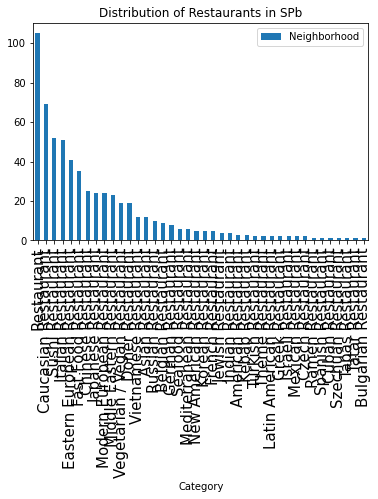

In [11]:
restaurant_counts = spb_full_venues[spb_full_venues['Category'].str.contains('Restaurant')].\
                    groupby('Category').count().sort_values('Neighborhood', ascending=False)

spb_restaurants = spb_full_venues.merge(restaurant_counts.reset_index(level=0)['Category'], how='inner')
# See data distribution

#spb_restaurants
restaurant_counts.reset_index(level=0)[['Category', 'Neighborhood']].plot.bar(x='Category', y='Neighborhood')
plt.title('Distribution of Restaurants in SPb')
plt.rcParams["figure.figsize"] = (20,20)
plt.xticks(size=15)

<h3>From the visualization above, it looks like Italian restaurants are popular but there are not many in the whole city of SPb. It's making a good opportunity for a potential new business. Let's now explore where would be the ideal place to open it.</h3>

In [12]:
restaurant_onehot = pd.get_dummies(spb_restaurants[['Category']], prefix='', prefix_sep='')
restaurant_onehot['Neighborhood'] = spb_restaurants['Neighborhood']
columns = [restaurant_onehot.columns[-1]] + list(restaurant_onehot.columns[:-1])
restaurant_onehot = restaurant_onehot[columns]

# 2. Score each of restaurant type for each of Neighborhood
restaurant_onehot = restaurant_onehot.groupby('Neighborhood').mean().reset_index()

# 3. Drop the 'Neighborhood' column
restaurant_onehot.drop('Neighborhood', axis=1)

,American Restaurant,Asian Restaurant,Belgian Restaurant,Bulgarian Restaurant,Caucasian Restaurant,Chinese Restaurant,Cuban Restaurant,Czech Restaurant,Doner Restaurant,Eastern European Restaurant,...,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tatar Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000
2,0.0,0.0,0.100000,0.0,0.200000,0.000000,0.0,0.0,0.000000,0.200000,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.200000,0.100000
3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.500000,0.000000,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000
4,0.0,0.2,0.000000,0.0,0.200000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.400,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,0.0,0.125000,0.0,0.125000,0.000000,0.0,0.0,0.000000,0.125000,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000
93,0.0,0.0,0.058824,0.0,0.235294,0.058824,0.0,0.0,0.000000,0.117647,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.058824
94,0.0,0.0,0.000000,0.0,0.125000,0.000000,0.0,0.0,0.000000,0.125000,...,0.0,0.0,0.375,0.0,0.0,0.0,0.0,0.125,0.000000,0.000000
95,0.0,0.0,0.000000,0.0,0.000000,0.500000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000


<h3>We are almost ready to start clustering the data. We need to utilize the elbow method to identify the best number of clusters based on the dataset that we have. Lets do it!</h3>

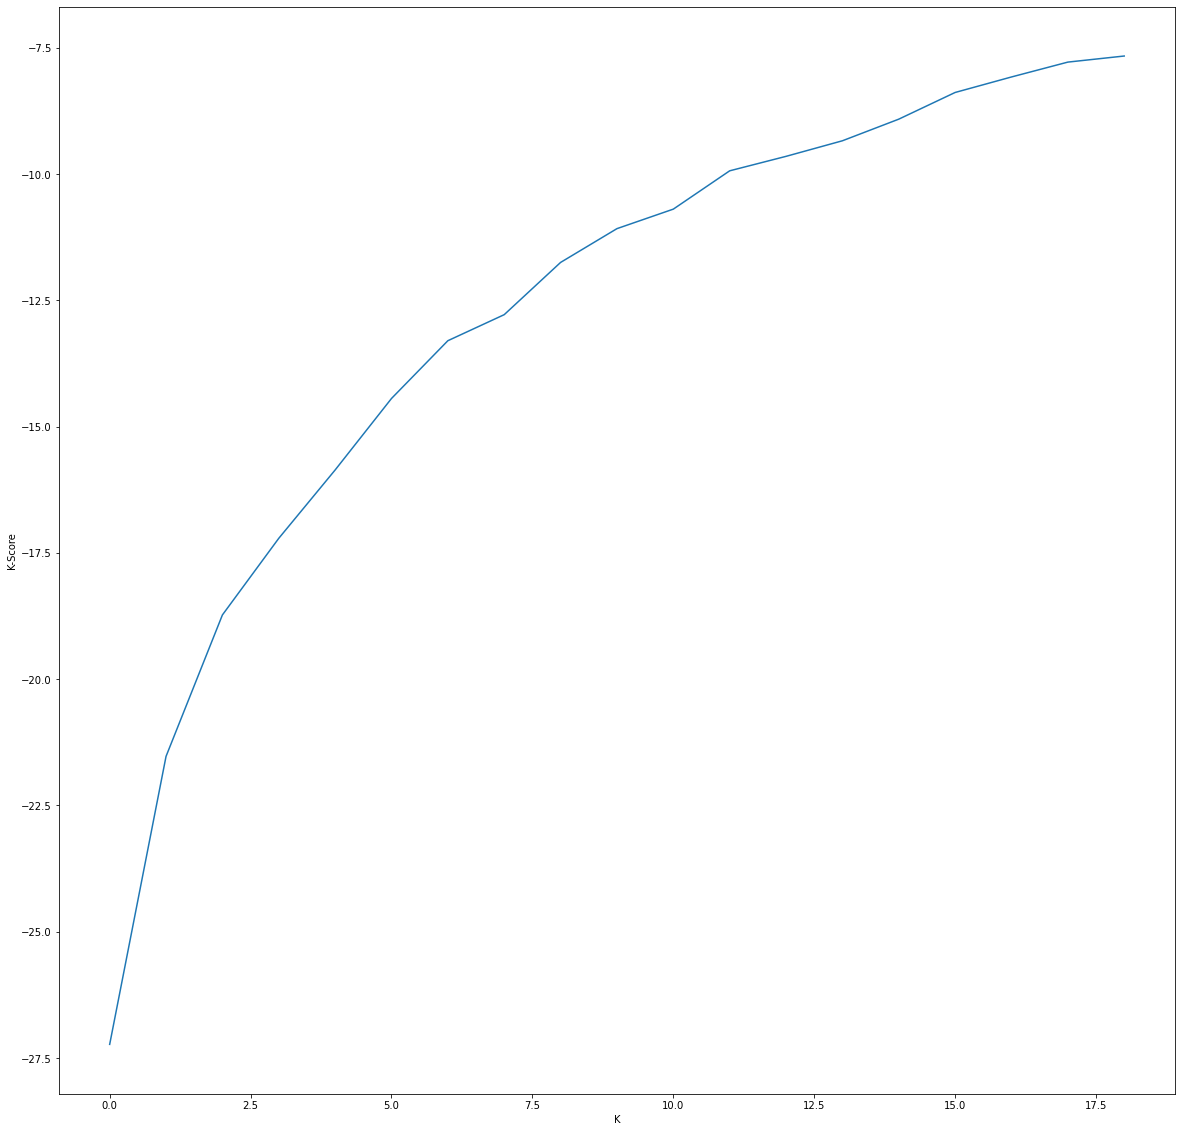

<Figure size 216x216 with 0 Axes>

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scores = []

restaurant_clustering = restaurant_onehot.drop('Neighborhood', axis=1)

for k in range(1, 20):
    scores.append(KMeans(n_clusters=k, random_state=1).fit(restaurant_clustering).score(restaurant_clustering))

plt.plot(scores)
plt.ylabel('K-Score')
plt.xlabel('K')
plt.figure(figsize=(3, 3))
plt.show()

<h3>The elbow method describes the best number of clusters found when there are no significant changes of the score observed. From the chart above, we can see that afrer 6 dinamique is slow and after 7+ model can be overfitted. Based on the elbow method, 6 is the best number of clusters we can use.</h3>

In [14]:
kclusters = 6
n = restaurant_onehot['Neighborhood']
Neighborhood = restaurant_onehot[['Neighborhood']]
restaurant_clustering = restaurant_onehot.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(restaurant_clustering)
clusters_label = pd.DataFrame([x for x in kmeans.labels_], columns=['Cluster'])

Neighborhood_cluster = pd.concat([clusters_label, Neighborhood], axis=1)
Neighborhood_cluster.groupby('Cluster').count()

,Neighborhood
Cluster,
0,8
1,19
2,10
3,43
4,9
5,8


<h3>It does not really give us good information on what this information entails, but 1 thing for sure is that the data are heavily distributed within 3 clusters.</h3>

In [15]:
top_restaurants = spb_restaurants[['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Category', 'Venue']].\
                groupby(by=['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Category']).count().reset_index().\
                groupby(by=['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude']).max().reset_index()

top_restaurants = top_restaurants.merge(Neighborhood_cluster, on='Neighborhood', how='inner')

In [16]:
import random

def add_cluster_to_map(lat_series, long_series, label_series, cluster_series, target_map, colors):
    for lat, lon, Neighborhood, cluster in zip(lat_series, long_series, label_series, cluster_series):
        label = folium.Popup('{}: Cluster {}'.format(Neighborhood, cluster), parse_html=True)
        folium.CircleMarker([lat, lon],
                            radius=5,
                            popup=label,
                            color='#000000',
                            fill=True,
                            fill_color=colors[cluster],
                            fill_opacity=1.0,
                            weight=2).add_to(target_map)

map_clusters = folium.Map(location=[spb_locator.latitude, spb_locator.longitude], zoom_start=13)
colors = ['#983a06', '#f57b27', '#0f8222', '#946bbd', '#1cad8e', '#374ae0', '#f5fa18', '#12d1fc']
add_cluster_to_map(top_restaurants['Neighborhood Latitude'],\
                  top_restaurants['Neighborhood Longitude'],\
                  top_restaurants['Neighborhood'],\
                  top_restaurants['Cluster'],\
                  map_clusters,
                  colors)
    
map_clusters

<h3>We now have a good vision on how the clustering looks like. Let us now see what are the characteristics of each cluster, by analyzing the top restaurant category on each cluster, as well as giving a preliminary label whether the restaurant should be opened in any of the Neighborhood within the cluster</h3>

In [17]:
top_restaurants[['Cluster', 'Category', 'Neighborhood']].groupby(by=['Cluster', 'Category']).count()

Neighborhood
Cluster Category                                   
0       Italian Restaurant                        4
        Restaurant                                2
        Sushi Restaurant                          2
1       Korean Restaurant                         1
        Restaurant                                3
        Sushi Restaurant                         10
        Tatar Restaurant                          1
        Theme Restaurant                          1
        Turkish Restaurant                        1
        Vegetarian / Vegan Restaurant             1
        Vietnamese Restaurant                     1
2       Eastern European Restaurant               1
        Restaurant                                7
        Russian Restaurant                        2
3       Caucasian Restaurant                      1
        Doner Restaurant                          1
        French Restaurant                         1
        Japanese Restaurant                       2
        Middle Eastern Restaurant                 2
        Modern European Restaurant                2
        Restaurant                                3
        Russian Restaurant                        1
        Seafood Restaurant                        1
        Sushi Restaurant                         14
        Szechuan Restaurant                       1
        Tapas Restaurant                          1
        Theme Restaurant                          1
        Vegetarian / Vegan Restaurant             2
        Vietnamese Restaurant                    10
4       Sushi Restaurant                          9
5       Restaurant                                8

In [18]:
potential_poi = ['Bookstore','Boat or Ferry','Beach',\
                         'Bridge', 'Hotel','Plaza','Museum','Castle',\
                         'Station','University','Mall',\
                         'Stadium','Park','Monument','Theater','Gallery'\
                         'Boutique', 'Circus', 'Cultural Center', 'Department Store'\
                         'Electronics Store', 'Escape Room', 'Historic Site', \
                         'Hot Spring', 'Music Venue', 'Multiplex', 'Nightclub', \
                         'Wine']
spb_poi = spb_full_venues[spb_full_venues['Category'].\
                                                str.contains('|'.join(potential_poi))].reset_index()
spb_poi

,index,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Category
0,2,Kolomna,59.923298,30.296024,Студия документальных фильмов «Лендок»,59.923931,30.296774,Indie Movie Theater
1,4,Kolomna,59.923298,30.296024,Никольский Сад,59.922979,30.299306,Park
2,6,Kolomna,59.923298,30.296024,The Seven Bridges Point (Семимостье),59.920811,30.298543,Historic Site
3,7,Kolomna,59.923298,30.296024,Мариинский театр главная сцена,59.925751,30.296686,Music Venue
4,8,Kolomna,59.923298,30.296024,Tre Bicchieri,59.923762,30.300558,Wine Bar
...,...,...,...,...,...,...,...,...
572,4592,Vladimirskij okrug,59.923115,30.342854,Музыкальная школа Виртуозы,59.917288,30.342036,Music Venue
573,4594,Vladimirskij okrug,59.923115,30.342854,Взаперти | квесты выйти из комнаты,59.918962,30.350331,Escape Room
574,4601,Vladimirskij okrug,59.923115,30.342854,Dostoevsky Museum (Музей Достоевского),59.927254,30.350909,Museum
575,4608,Vladimirskij okrug,59.923115,30.342854,Музыкальный театр «Зазеркалье»,59.929672,30.343550,Theater


In [19]:
from folium import plugins

poi_list = list(spb_poi[['Venue Latitude', 'Venue Longitude']].values)
poi_map = folium.Map([spb_locator.latitude, spb_locator.longitude], zoom_start=11)
heat_map = plugins.HeatMap(poi_list, name='SPb POI')
poi_map.add_child(heat_map)
folium.LayerControl().add_to(poi_map)

poi_map

<h3>POI heat map shows us that center of the city has maximum of POIs.</h3>
<h3>Let's cross check between:</h3>
<h3> 1. cluster map</h3>
<h3> 2. POI heat map</h3>
<h3> 3. itallian restaurants map</h3>
<h3>And we'll see what we got</h3>

In [20]:
final_map = poi_map

add_cluster_to_map(top_restaurants['Neighborhood Latitude'],top_restaurants['Neighborhood Longitude'],
                  top_restaurants['Neighborhood'],top_restaurants['Cluster'],final_map,colors)
final_map

In [21]:
r_Neighborhoods = ['№ 7', 'Vasilevskij', 'CHkalovskoe', 'Okrug Petrovskij','Kronverkskoe','Vladimirskij okrug',
                   'Aptekarskij ostrov', 'Litejnyj okrug', 'Dvorcovyj okrug', '№ 78','Sennoj okrug']

selected_Neighborhoods = top_restaurants[top_restaurants['Neighborhood'].isin(r_Neighborhoods)]

rec_map = poi_map

add_cluster_to_map(selected_Neighborhoods['Neighborhood Latitude'],selected_Neighborhoods['Neighborhood Longitude'],
                  selected_Neighborhoods['Neighborhood'],selected_Neighborhoods['Cluster'],rec_map,colors)

add_polygon_marker_to_map(spb_it_restaurants['Venue Latitude'],spb_it_restaurants['Venue Longitude'], 
                          spb_it_restaurants['Venue'], 'black', 'white', rec_map)  
rec_map

<h3>Almost all places with a high concentration of POIs have Italian restaurants. </h3>
<h3>But there are exceptions that we were looking for: </h3>

<h3>
    
* Vladimirskij okrug, 
* Izmajlovskoe, 
* District № 78, 
* Ostrov Dekabristov;
* Gavan.

</h3>
    
<h3>We can research the menus of non-specialized restaurants in these areas. 
Perhaps one of them specializes in Italian cuisine, but did not indicate this in the Foursquire.</h3>

<h3>The goal of the research has been achieved, we have found several potential areas of the city that fit our criteria.</h3>